In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import missingno as miss
import datetime as date
import keras_tuner

### My thoughts behind this process:
We look for the ideal mix of variables for real data and our training method. As a result, we will utilize our data for our training process—all variables from 2001 to 2019—and so on, to cut down on needless complexity.

In [2]:
rain=pd.read_csv("D:\\wallpapers and photos\\paper\\ctg_SPEI_01_month.csv")

In [3]:
rain

,month,year,SPEI,CHIRPS,IMERGE,LST_DAY,LST_Night,Real Data
0,1,1990,-1.440798,4.715943,NaN,NaN,NaN,0
1,2,1990,1.587341,32.093627,NaN,NaN,NaN,39
2,3,1990,1.694348,81.816802,NaN,NaN,NaN,53
3,4,1990,0.842682,129.246161,NaN,NaN,NaN,250
4,5,1990,0.274244,227.500759,NaN,NaN,NaN,205
...,...,...,...,...,...,...,...,...
355,8,2019,-1.266436,719.174234,415.233358,308.000217,301.812465,466
356,9,2019,0.720027,312.809505,382.310666,307.674666,302.258737,365
357,10,2019,-0.017451,153.181688,168.655851,305.435565,300.115824,123
358,11,2019,0.443243,109.113888,90.805858,302.333352,294.946265,83


<Axes: >

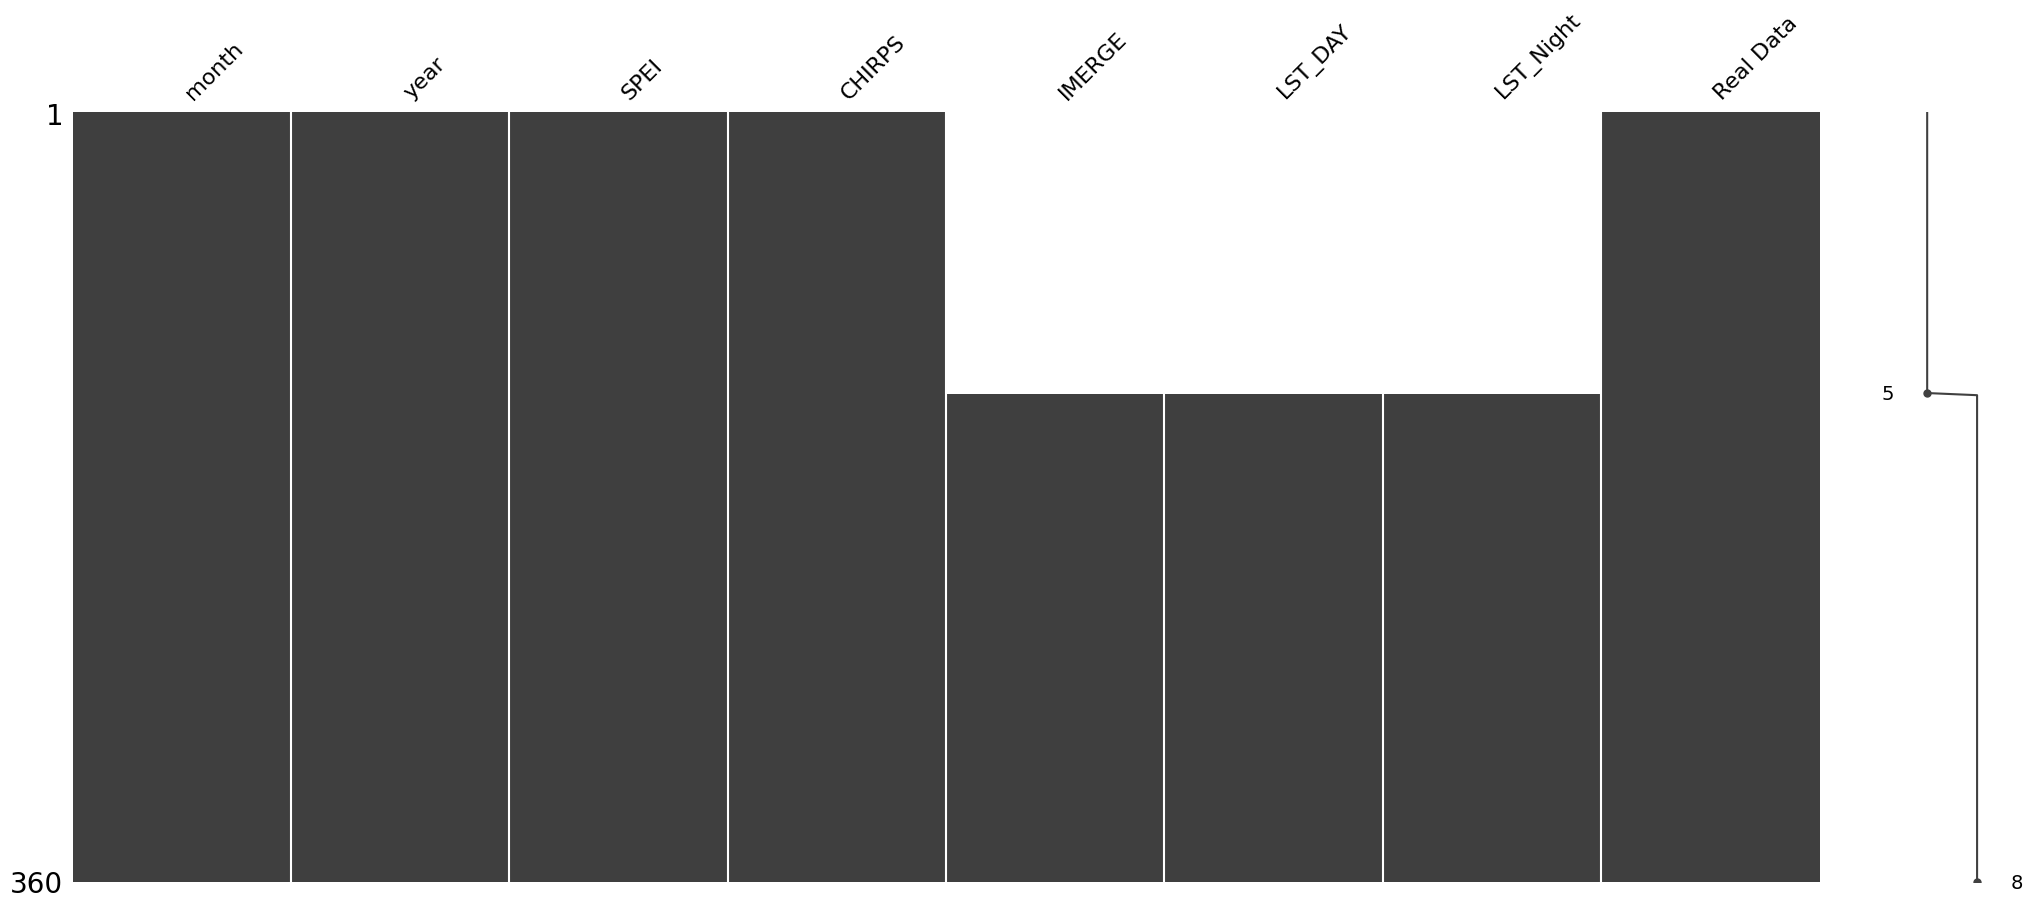

In [4]:
miss.matrix(rain)

In [5]:
rain["date"]=pd.to_datetime(rain[["year","month"]].assign(day=1))
rain

,month,year,SPEI,CHIRPS,IMERGE,LST_DAY,LST_Night,Real Data,date
0,1,1990,-1.440798,4.715943,NaN,NaN,NaN,0,1990-01-01
1,2,1990,1.587341,32.093627,NaN,NaN,NaN,39,1990-02-01
2,3,1990,1.694348,81.816802,NaN,NaN,NaN,53,1990-03-01
3,4,1990,0.842682,129.246161,NaN,NaN,NaN,250,1990-04-01
4,5,1990,0.274244,227.500759,NaN,NaN,NaN,205,1990-05-01
...,...,...,...,...,...,...,...,...,...
355,8,2019,-1.266436,719.174234,415.233358,308.000217,301.812465,466,2019-08-01
356,9,2019,0.720027,312.809505,382.310666,307.674666,302.258737,365,2019-09-01
357,10,2019,-0.017451,153.181688,168.655851,305.435565,300.115824,123,2019-10-01
358,11,2019,0.443243,109.113888,90.805858,302.333352,294.946265,83,2019-11-01


In [6]:
rain=rain[["date","SPEI","CHIRPS","IMERGE","LST_DAY","LST_Night","Real Data"]]

In [7]:
rain

,date,SPEI,CHIRPS,IMERGE,LST_DAY,LST_Night,Real Data
0,1990-01-01,-1.440798,4.715943,NaN,NaN,NaN,0
1,1990-02-01,1.587341,32.093627,NaN,NaN,NaN,39
2,1990-03-01,1.694348,81.816802,NaN,NaN,NaN,53
3,1990-04-01,0.842682,129.246161,NaN,NaN,NaN,250
4,1990-05-01,0.274244,227.500759,NaN,NaN,NaN,205
...,...,...,...,...,...,...,...
355,2019-08-01,-1.266436,719.174234,415.233358,308.000217,301.812465,466
356,2019-09-01,0.720027,312.809505,382.310666,307.674666,302.258737,365
357,2019-10-01,-0.017451,153.181688,168.655851,305.435565,300.115824,123
358,2019-11-01,0.443243,109.113888,90.805858,302.333352,294.946265,83


In [8]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       360 non-null    datetime64[ns]
 1   SPEI       360 non-null    float64       
 2   CHIRPS     360 non-null    float64       
 3   IMERGE     228 non-null    float64       
 4   LST_DAY    228 non-null    float64       
 5   LST_Night  228 non-null    float64       
 6   Real Data  360 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 19.8 KB


In [9]:
rain[134:]

,date,SPEI,CHIRPS,IMERGE,LST_DAY,LST_Night,Real Data
134,2001-03-01,-0.367564,23.109298,13.079091,306.100558,293.616292,1
135,2001-04-01,-0.787717,51.142762,51.683306,310.277379,297.860993,41
136,2001-05-01,-0.245257,307.985096,402.869898,306.759751,298.907355,423
137,2001-06-01,-0.652502,663.798851,871.690367,306.074816,292.874378,389
138,2001-07-01,-0.356688,527.327652,457.183686,614.084272,578.960248,385
...,...,...,...,...,...,...,...
355,2019-08-01,-1.266436,719.174234,415.233358,308.000217,301.812465,466
356,2019-09-01,0.720027,312.809505,382.310666,307.674666,302.258737,365
357,2019-10-01,-0.017451,153.181688,168.655851,305.435565,300.115824,123
358,2019-11-01,0.443243,109.113888,90.805858,302.333352,294.946265,83


In [10]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
scale=SklearnTransformerWrapper(transformer=StandardScaler(),variables=["SPEI","CHIRPS","IMERGE","LST_DAY","LST_Night","Real Data"])
rain=scale.fit_transform(rain)
rain

,date,SPEI,CHIRPS,IMERGE,LST_DAY,LST_Night,Real Data
0,1990-01-01,-1.438668,-0.943595,NaN,NaN,NaN,-0.826823
1,1990-02-01,1.796774,-0.833907,NaN,NaN,NaN,-0.695896
2,1990-03-01,1.911106,-0.634694,NaN,NaN,NaN,-0.648897
3,1990-04-01,1.001137,-0.444670,NaN,NaN,NaN,0.012449
4,1990-05-01,0.393784,-0.051018,NaN,NaN,NaN,-0.138620
...,...,...,...,...,...,...,...
355,2019-08-01,-1.252369,1.918847,0.745888,0.123120,0.233112,0.737580
356,2019-09-01,0.870085,0.290767,0.609859,0.107447,0.256306,0.398514
357,2019-10-01,0.082120,-0.348774,-0.272910,-0.000353,0.144935,-0.413901
358,2019-11-01,0.574352,-0.525329,-0.594567,-0.149706,-0.123734,-0.548185


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
%matplotlib inline

<Axes: xlabel='date', ylabel='Real Data'>

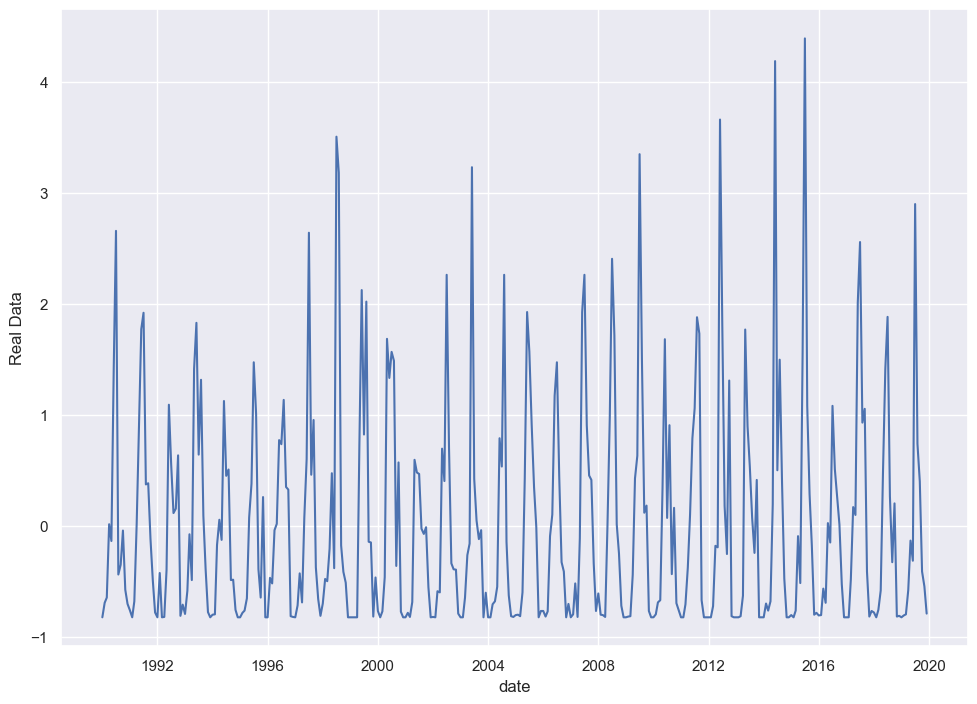

In [12]:
sns.lineplot(x="date",y="Real Data",data=rain)

<Axes: xlabel='date', ylabel='SPEI'>

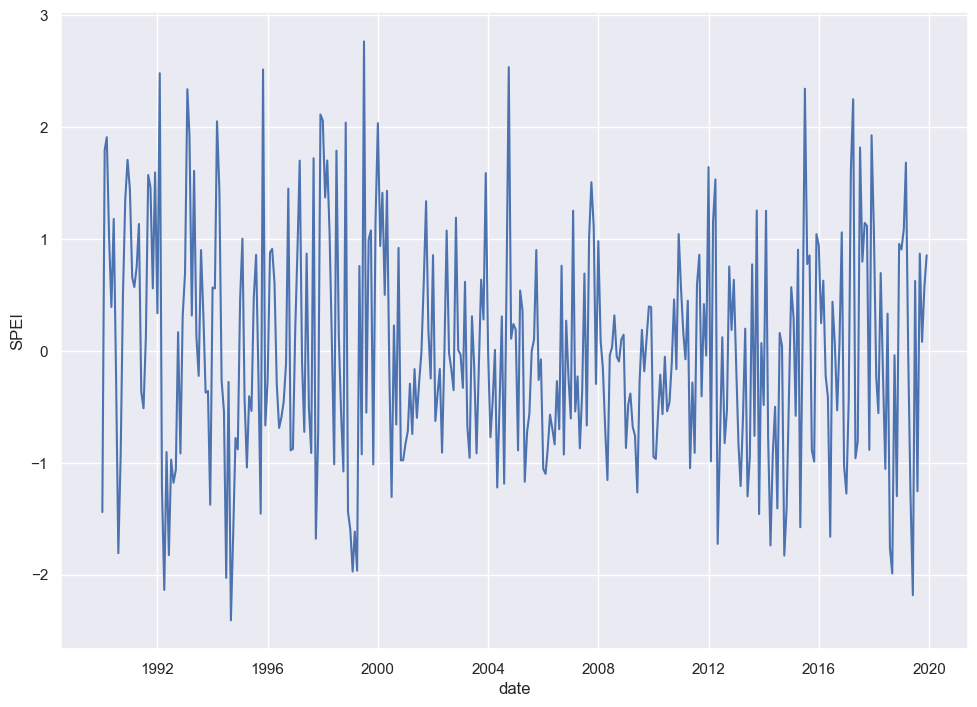

In [13]:
sns.lineplot(x="date",y="SPEI",data=rain)

<Axes: xlabel='date', ylabel='LST_Night'>

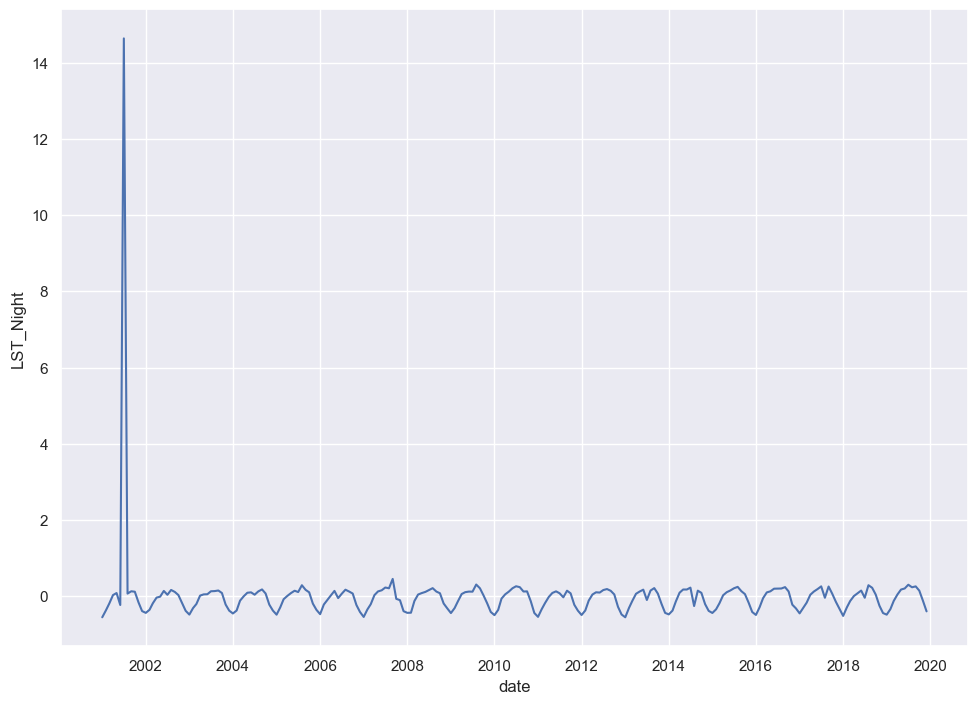

In [14]:
sns.lineplot(x="date",y="LST_Night",data=rain)

<Axes: >

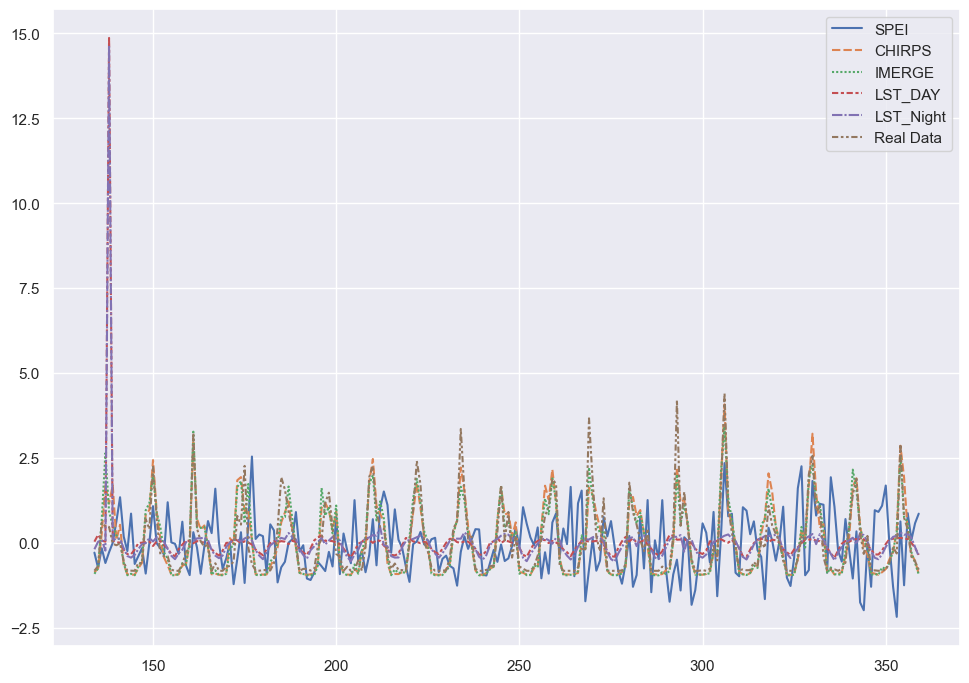

In [15]:
sns.lineplot(data=rain[134:])

### Cleaning the data with isolation forest

In [16]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(rain[134:].drop(["date"],axis=1))
rain_clean = rain[134:][outliers == 1]
rain_clean

,date,SPEI,CHIRPS,IMERGE,LST_DAY,LST_Night,Real Data
134,2001-03-01,-0.291962,-0.869903,-0.915715,0.031663,-0.192855,-0.823466
135,2001-04-01,-0.740878,-0.757588,-0.756212,0.232753,0.027748,-0.689182
136,2001-05-01,-0.161282,0.271438,0.694805,0.063399,0.082129,0.593225
139,2001-08-01,-0.003382,1.692436,0.499602,0.060172,0.067369,-0.027836
140,2001-09-01,0.628523,0.083971,0.225102,0.028206,0.127893,-0.074835
...,...,...,...,...,...,...,...
355,2019-08-01,-1.252369,1.918847,0.745888,0.123120,0.233112,0.737580
356,2019-09-01,0.870085,0.290767,0.609859,0.107447,0.256306,0.398514
357,2019-10-01,0.082120,-0.348774,-0.272910,-0.000353,0.144935,-0.413901
358,2019-11-01,0.574352,-0.525329,-0.594567,-0.149706,-0.123734,-0.548185


### Plot after treating outlier

<Axes: >

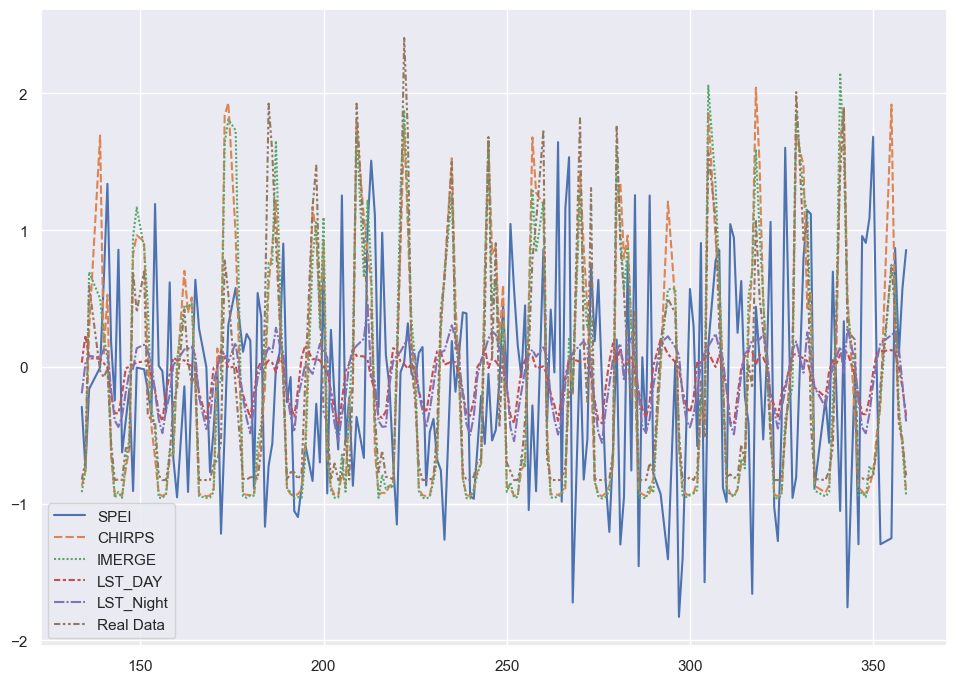

In [17]:
sns.lineplot(data=rain_clean)

In [18]:
train_set, test_set= np.split(rain_clean, [int(.6 *len(rain_clean))])

C:\Users\Lenovo\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [19]:
train_set.shape,test_set.shape

((121, 7), (82, 7))

In [20]:
train_set, val_set= np.split(train_set, [int(.8 *len(train_set))])

In [21]:
train_set.shape,test_set.shape,val_set.shape

((96, 7), (82, 7), (25, 7))

In [22]:
x_train=train_set.drop(["date","Real Data"],axis=1)
y_train=train_set["Real Data"]

In [23]:
x_test=test_set.drop(["date","Real Data"],axis=1)
y_test=test_set["Real Data"]

In [24]:
x_val=val_set.drop(["date","Real Data"],axis=1)
y_val=val_set["Real Data"]

In [25]:
x_train.shape,y_train.shape

((96, 5), (96,))

In [26]:
x_test.shape,y_test.shape

((82, 5), (82,))

In [27]:
x_val.shape,y_val.shape

((25, 5), (25,))

### Let me walk You the through the process:
\\\ there the values from (2001-2019) and for each year it consists of 12 month.
### 1.  Sampling Rate:
---The interval at which you sample the data.
---It should reflect the granularity of the time sequence. If you are dealing with monthly data and want to maintain the sequence at a monthly level, the sampling rate can be 1, indicating that the data is sampled each month.
### 2. Sequence Length:
---The number of previous time steps to include in each input sequence.
---This determines how many previous time steps (months) you will use to predict the next. A reasonable starting point for monthly data might be 12, indicating that you use one year of data to make predictions.
### 3. Batch Size:
---The number of sequences to process together in each training iteration.
---Given that you only have 96 rows, a smaller batch size (like 1 or 2) would allow more frequent updates during training.

In [28]:
tf.random.set_seed(1234)
sampling_rate = 1
sequence_length =12
#delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 1
train_dataset=keras.utils.timeseries_dataset_from_array(data=x_train,targets=y_train,sampling_rate=sampling_rate,sequence_length=sequence_length,shuffle=True,batch_size=batch_size)
test_dataset=keras.utils.timeseries_dataset_from_array(data=x_test,targets=y_test,sampling_rate=sampling_rate,sequence_length=sequence_length,shuffle=True,batch_size=batch_size)
val_dataset=keras.utils.timeseries_dataset_from_array(data=x_val,targets=y_val,sampling_rate=sampling_rate,sequence_length=sequence_length,shuffle=True,batch_size=batch_size)

In [29]:
from keras import layers

In [30]:
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

### RNN model architechture

In [31]:
best_architechture_rnn=keras.models.load_model("rain_architechture_new_tuned.keras")

In [32]:
best_architechture_rnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12, 5)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 12, 384)      599040      ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 12, 416)      1332864     ['lstm[0][0]']                   
                                                                                                  
 dense_1 (Dense)                (None, 12, 352)      146784      ['lstm_1[0][0]']                 
                                                                                              

In [33]:
model_rnn_new= keras.models.load_model("rain_encode_new_tuned_final.keras",custom_objects={'r2_score': r2_score})

In [34]:
results=model_rnn_new.evaluate(test_dataset)


71/71 [==============================] - 11s 121ms/step - loss: 0.2774 - rmse: 0.5076 - mae: 0.3395


In [35]:
from tabulate import tabulate
table = [
    ["Algorithm",  "RNN"],
    ["RMSE", results[1]],
    ["MAE", results[2]]
]

# Display the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════╤══════════╕
│ Algorithm   │      RNN │
╞═════════════╪══════════╡
│ RMSE        │ 0.507615 │
├─────────────┼──────────┤
│ MAE         │ 0.33951  │
╘═════════════╧══════════╛


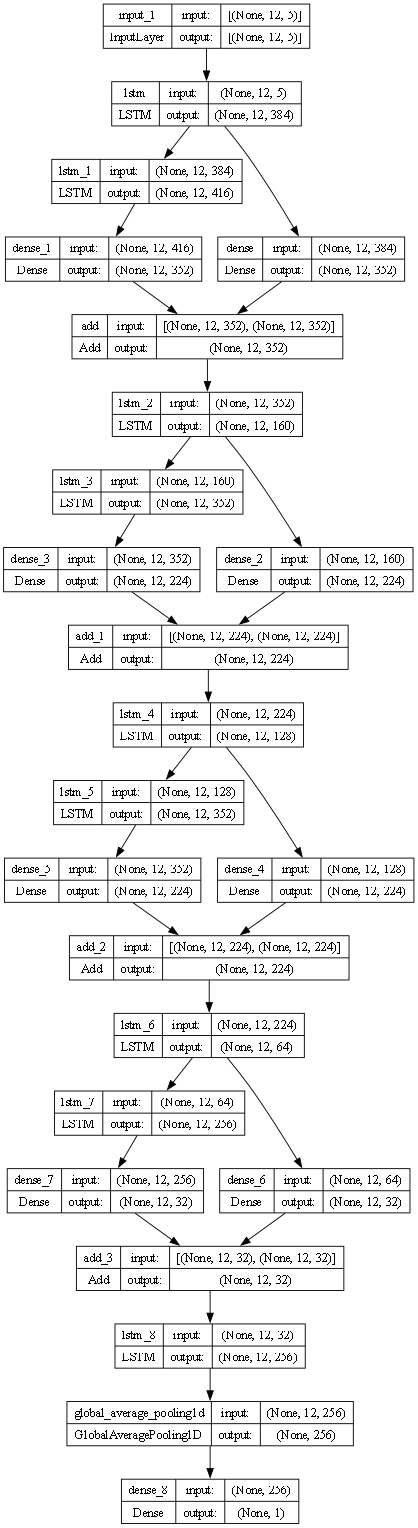

In [36]:
keras.utils.plot_model(model_rnn_new, show_shapes=True,dpi=65)

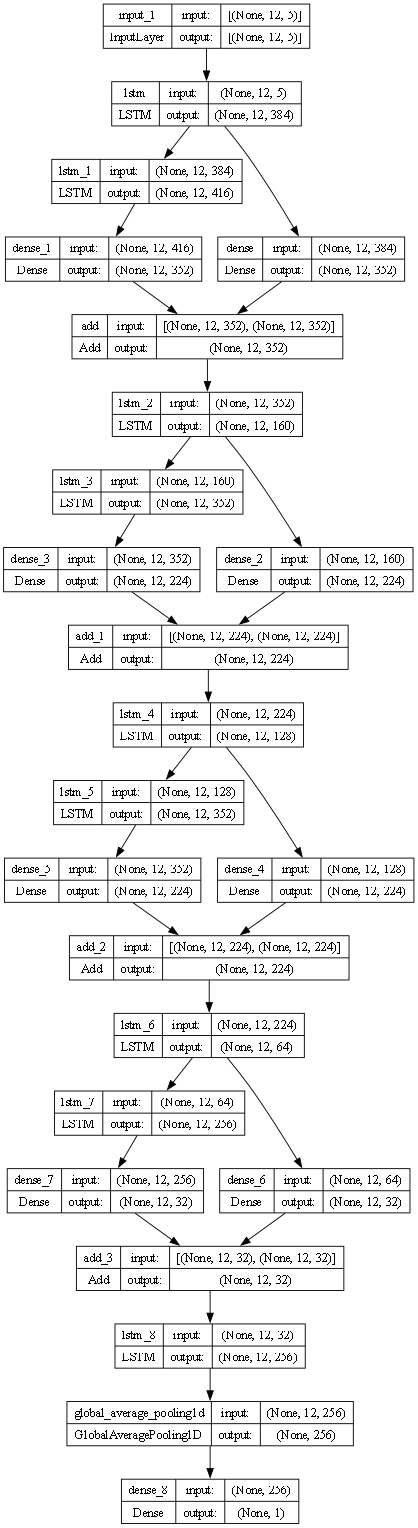

In [37]:
keras.utils.plot_model(best_architechture_rnn, show_shapes=True,dpi=65)